In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import genetools

In [2]:
from matplotlib import rc

rc("font", **{"family": "sans-serif", "sans-serif": ["Helvetica"], "size": 12})

# ensure text is editable when we save figures in vector format
rc("pdf", fonttype=42)
rc("ps", fonttype=42)

sns.set_style("white")
sns.set_context("paper", font_scale=1.25)

# Overall UMAP

In [3]:
umap_df = pd.read_csv("data/KIR_pos_CD8_ss2.csv")
umap_df.head()

,unique_id,cluster_id,disease,patient ID,UMAP_1,UMAP_2,PC_1,PC_2
0,CS2_S763,6,MS,MS0910,3.056403,-4.460952,-7.643621,-2.933953
1,CS2_S758,6,SLE,SLE23,3.053515,-4.531020,-4.041482,-1.604832
2,CS2_S760,6,MS,MS0910,3.031344,-4.529122,-2.137968,0.128530
3,CS2_S764,6,MS,MS0910,2.979731,-4.501960,-6.814712,-1.279005
4,CS2_S766,6,MS,MS0910,2.946279,-4.468045,-6.046314,1.852909


In [4]:
# assign consistent colors
disease_palette = genetools.palette.convert_palette_list_to_dict(
    sns.color_palette("bright"), umap_df["disease"].unique(), sort_hues=True
)
disease_palette.keys()

dict_keys(['CeD', 'HD', 'MS', 'SLE'])

In [5]:
# assign consistent colors
cluster_palette = genetools.palette.convert_palette_list_to_dict(
    sns.color_palette("bright"), umap_df["cluster_id"].unique(), sort_hues=True
)
cluster_palette.update({f"Cluster {k}": v for k, v in cluster_palette.items()})
cluster_palette.keys()

dict_keys([1, 2, 3, 4, 5, 6, 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6'])

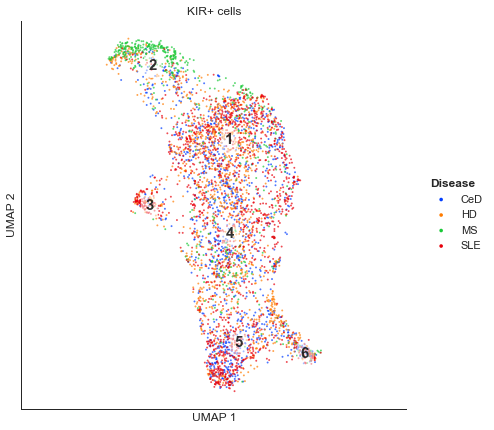

In [6]:
fig, ax = genetools.plots.scatterplot(
    data=umap_df,
    x_axis_key="UMAP_1",
    y_axis_key="UMAP_2",
    hue_key="disease",
    label_key="cluster_id",
    equal_aspect_ratio=True,
    remove_x_ticks=True,
    remove_y_ticks=True,
    legend_title="Disease",
    alpha=0.7,
    figsize=(6, 6),
    discrete_palette=disease_palette,
)
plt.title("KIR+ cells")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
genetools.plots.savefig(fig, "out/disease_clusters.pdf")

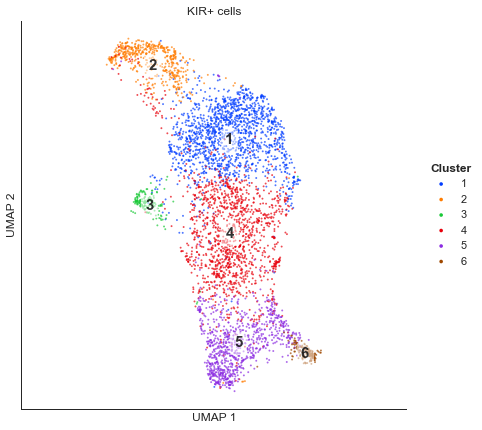

In [7]:
fig, ax = genetools.plots.scatterplot(
    data=umap_df,
    x_axis_key="UMAP_1",
    y_axis_key="UMAP_2",
    hue_key="cluster_id",
    label_key="cluster_id",
    equal_aspect_ratio=True,
    remove_x_ticks=True,
    remove_y_ticks=True,
    legend_title="Cluster",
    alpha=0.7,
    figsize=(6, 6),
    discrete_palette=cluster_palette,
)
plt.title("KIR+ cells")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
genetools.plots.savefig(fig, "out/umap_clusters.pdf")

In [8]:
umap_df.groupby(["disease", "cluster_id"]).size()

disease  cluster_id
CeD      1             338
         2              66
         3              14
         4             380
         5             268
         6              57
HD       1             470
         2             132
         3              54
         4             433
         5             212
         6              34
MS       1             115
         2             264
         3               5
         4             111
         5              24
         6              18
SLE      1             585
         2              27
         3              92
         4             404
         5             366
         6              43
dtype: int64

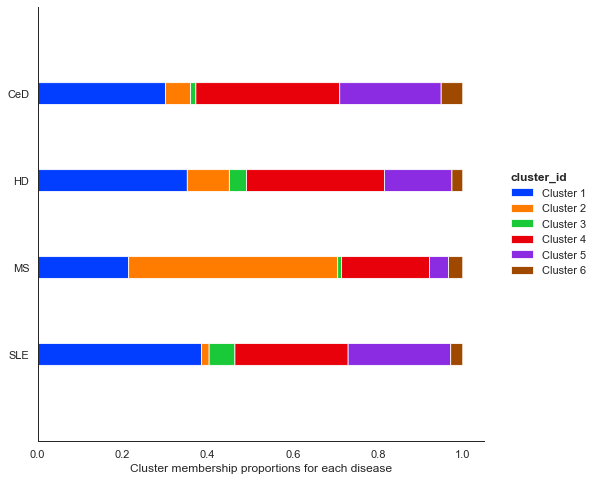

In [9]:
# barplot of how each disease is distributed across the clusters
fig, ax = genetools.plots.stacked_bar_plot(
    # Convert to "Cluster N" format
    umap_df.assign(cluster_id="Cluster " + umap_df["cluster_id"].astype(str)),
    index_key="disease",
    hue_key="cluster_id",
    normalize=True,
    axis_label="Cluster membership proportions for each disease",
    palette=cluster_palette,
)
genetools.plots.savefig(fig, "out/disease_cluster_membership.barplot.pdf")

# T cell expansion — plot all expanded vs. unexpanded KIR+:

In [10]:
# subset of previous df: cells with TCR sequences
umap_tcr_df = pd.read_csv("data/KIR_pos_CD8_ss2_with_TCR.csv")
umap_tcr_df.head()

,unique_id,cluster_id,disease,patient ID,UMAP_1,UMAP_2,PC_1,PC_2,unique_BC_pair,Lib,i5,i7,KIR positivity,Disease,TRBV,TRBJ,CDR3b,frequency,expanded
0,CS2_S763,6,MS,MS0910,3.056403,-4.460952,-7.643621,-2.933953,CAGATTACCTAA-ATTCTCAGCTAA,CS2,ATTCTCAGCTAA,CAGATTACCTAA,KIR+,MS,TRBV7-3,TRBJ1-6,CASSLDGDYNSPLHF,1,Not expanded
1,CS2_S760,6,MS,MS0910,3.031344,-4.529122,-2.137968,0.128530,ATAACAGGTCAA-AGATCTATGGAA,CS2,AGATCTATGGAA,ATAACAGGTCAA,KIR+,MS,TRBV6-5,TRBJ2-2,CASSEVLTGTGELFF,1,Not expanded
2,CS2_S764,6,MS,MS0910,2.979731,-4.501960,-6.814712,-1.279005,AGGTCCATTCAA-GCCATCCACAAA,CS2,GCCATCCACAAA,AGGTCCATTCAA,KIR+,MS,TRBV5-6,TRBJ1-2,CASSSEVGGADGYTF,1,Not expanded
3,CS2_S766,6,MS,MS0910,2.946279,-4.468045,-6.046314,1.852909,GACTACCATCAA-GAACGACCAGAA,CS2,GAACGACCAGAA,GACTACCATCAA,KIR+,MS,TRBV7-9,TRBJ2-1,CASSLYDXLWPNEQFF,1,Not expanded
4,CS2_S567,6,CeD,CeD60,2.908136,-4.601738,-5.806872,4.539188,AGGACTGAACAA-TGAAGCGACGAA,CS2,TGAAGCGACGAA,AGGACTGAACAA,KIR+,CeD,TRBV19,TRBJ2-5,CASSIDSEETQYF,1,Not expanded


In [11]:
umap_tcr_df["expanded"].value_counts()

Expanded        2149
Not expanded    1421
Name: expanded, dtype: int64

In [12]:
# define colors and z-orders

other_style = genetools.palette.HueValueStyle(
    color=sns.color_palette("pastel")[-3], zorder=1
)
expansion_palette = {
    "Expanded": genetools.palette.HueValueStyle(color="#e74c3c", zorder=20, hatch="//"),
    "Not expanded": genetools.palette.HueValueStyle(color="#3498db", zorder=10),
    "Other patients": other_style,
    "Other diseases": other_style,
}

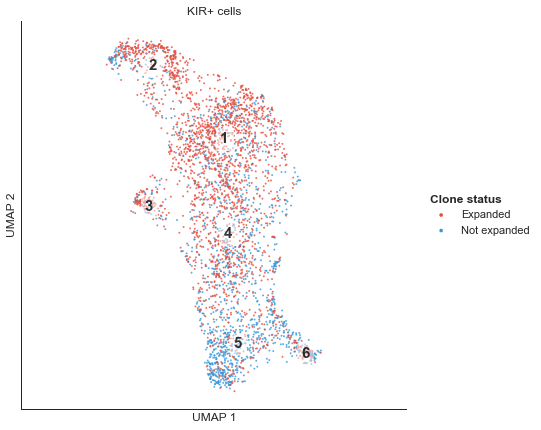

In [13]:
fig, ax = genetools.plots.scatterplot(
    data=umap_tcr_df,
    x_axis_key="UMAP_1",
    y_axis_key="UMAP_2",
    hue_key="expanded",
    discrete_palette=expansion_palette,
    label_key="cluster_id",
    equal_aspect_ratio=True,
    remove_x_ticks=True,
    remove_y_ticks=True,
    legend_title="Clone status",
    alpha=0.8,
    figsize=(6, 6),
)
plt.title("KIR+ cells")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
genetools.plots.savefig(fig, "out/kir_positive_expansion.pdf")

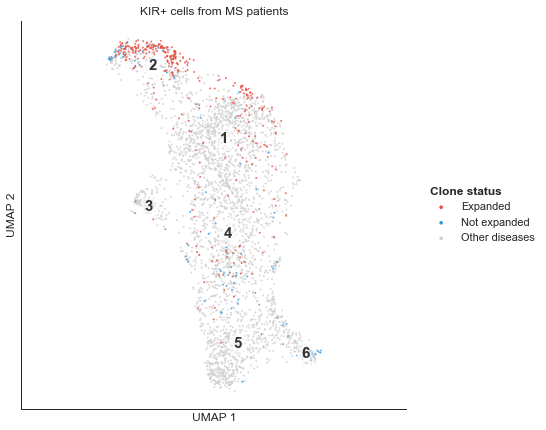

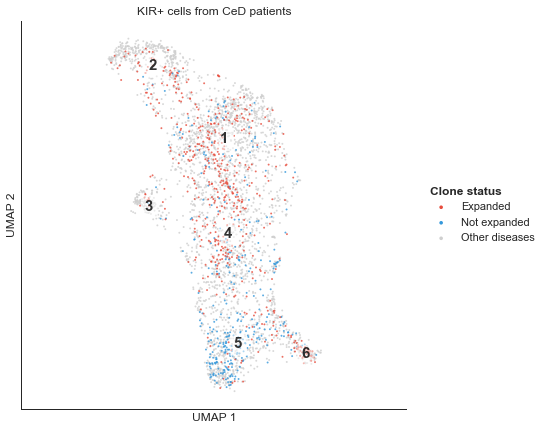

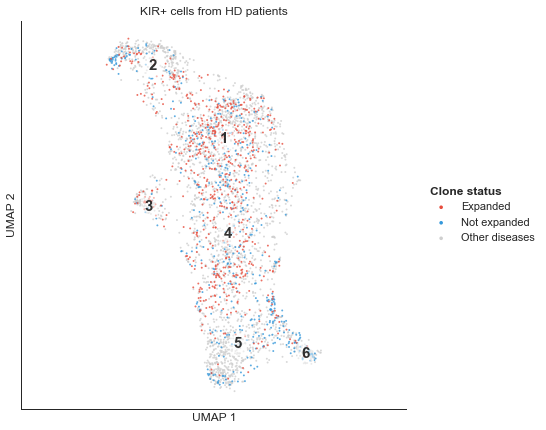

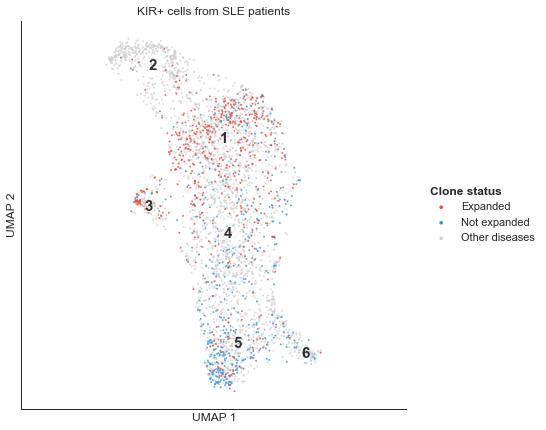

In [14]:
# plot per disease
for disease in umap_tcr_df["disease"].unique():
    # keep points from other diseases, but change their expanded label
    plot_df = umap_tcr_df.copy()
    plot_df.loc[plot_df["disease"] != disease, "expanded"] = "Other diseases"

    fig, ax = genetools.plots.scatterplot(
        data=plot_df,
        x_axis_key="UMAP_1",
        y_axis_key="UMAP_2",
        hue_key="expanded",
        discrete_palette=expansion_palette,
        label_key="cluster_id",
        equal_aspect_ratio=True,
        remove_x_ticks=True,
        remove_y_ticks=True,
        legend_title="Clone status",
        alpha=0.8,
        figsize=(6, 6),
    )
    plt.title(f"KIR+ cells from {disease} patients")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    genetools.plots.savefig(fig, f"out/kir_positive_expansion.disease_{disease}.pdf")

In [15]:
umap_tcr_df.groupby(["disease", "cluster_id", "expanded"]).size()

disease  cluster_id  expanded    
CeD      1           Expanded        182
                     Not expanded     50
         2           Expanded         51
                     Not expanded      4
         3           Expanded         10
                     Not expanded      3
         4           Expanded        208
                     Not expanded    106
         5           Expanded         48
                     Not expanded    176
         6           Expanded         43
                     Not expanded      8
HD       1           Expanded        269
                     Not expanded    121
         2           Expanded         60
                     Not expanded     54
         3           Expanded         31
                     Not expanded     13
         4           Expanded        240
                     Not expanded    139
         5           Expanded         54
                     Not expanded    118
         6           Expanded          4
                     No

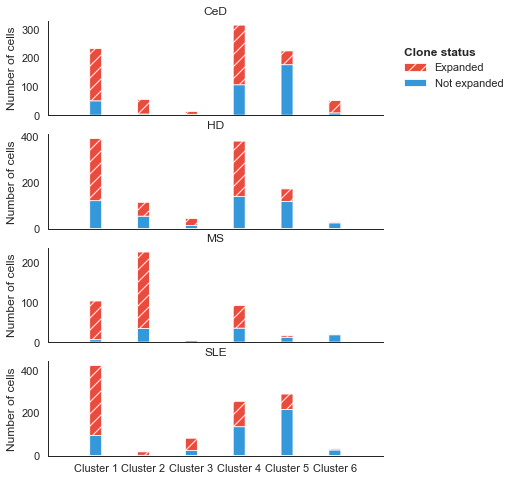

In [16]:
# plot per disease using subplots with shared X axis
fig, axarr = plt.subplots(
    figsize=(6, 8), nrows=umap_tcr_df["disease"].nunique(), sharex=True, sharey=False
)

for ix, (ax, (disease, grp)) in enumerate(zip(axarr, umap_tcr_df.groupby("disease"))):
    enable_legend = ix == 0
    genetools.plots.stacked_bar_plot(
        # Convert to "Cluster N" format
        grp.assign(cluster_id="Cluster " + grp["cluster_id"].astype(str)),
        index_key="cluster_id",
        hue_key="expanded",
        normalize=False,
        axis_label="Number of cells",
        vertical=True,
        hue_order=["Not expanded", "Expanded"],
        palette=expansion_palette,
        ax=ax,
        legend_title="Clone status",
        enable_legend=enable_legend,
    )
    ax.set_title(disease)

genetools.plots.savefig(
    fig, f"out/kir_positive_expansion.by_disease.by_cluster.barplot.pdf"
)

/users/maximz/anaconda3/envs/cuda-env/lib/python3.7/site-packages/genetools/plots.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


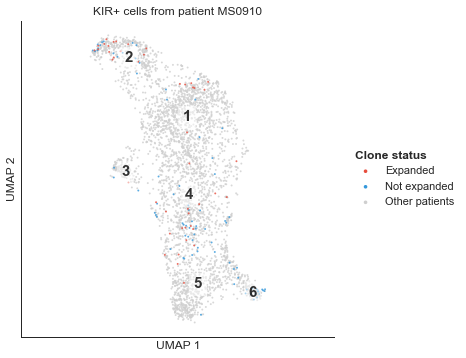

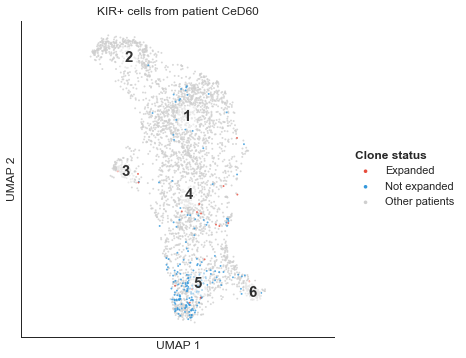

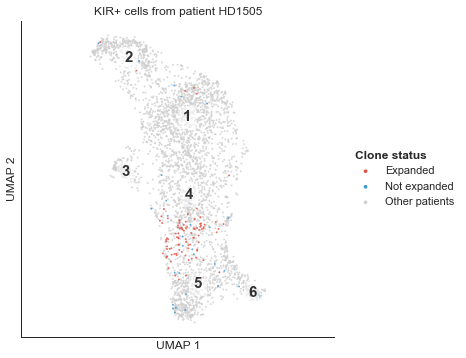

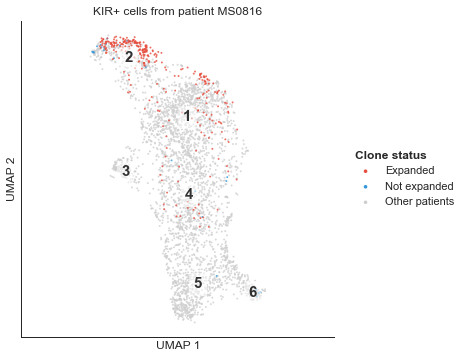

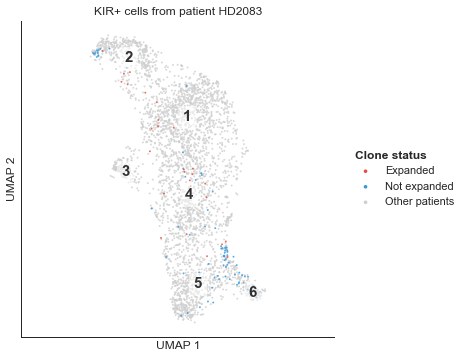

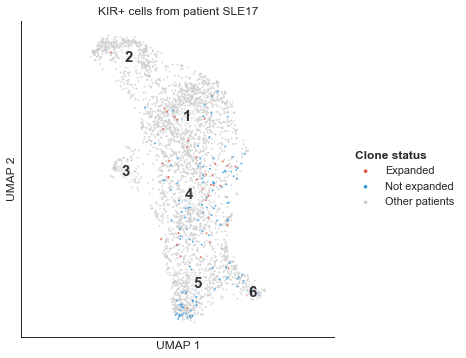

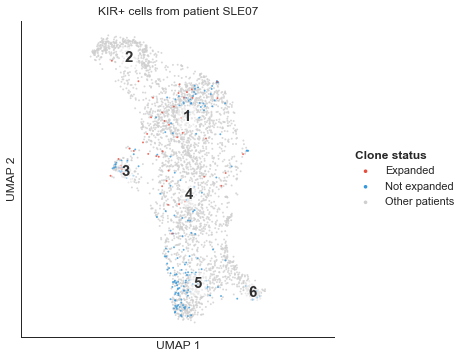

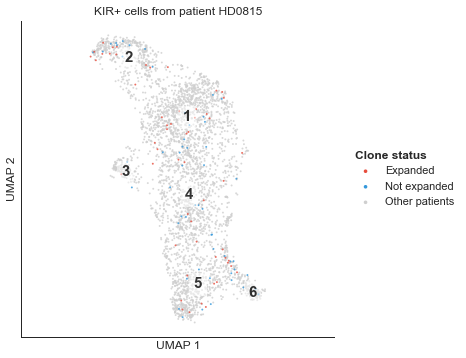

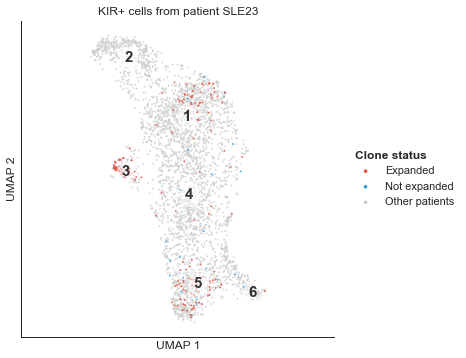

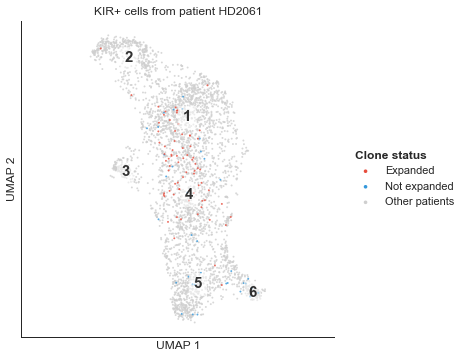

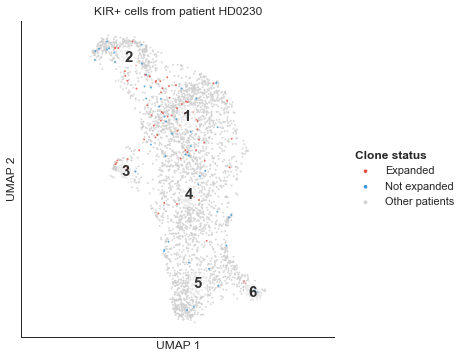

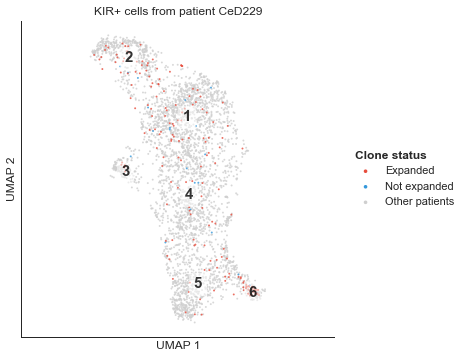

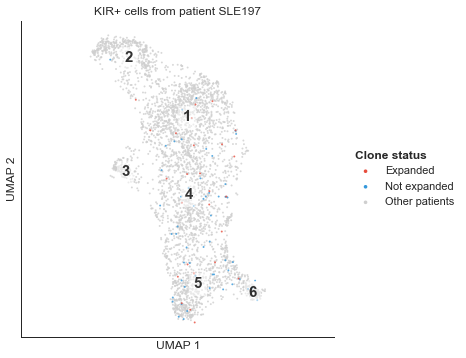

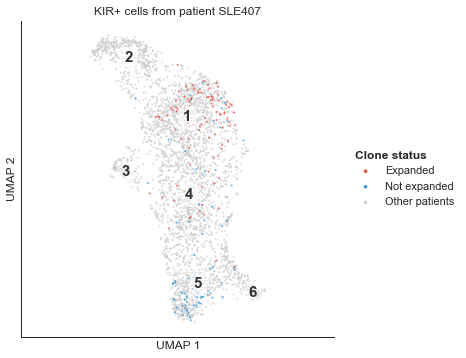

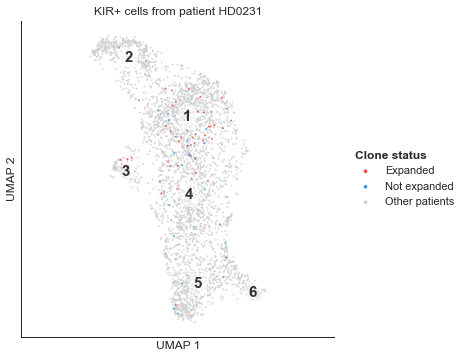

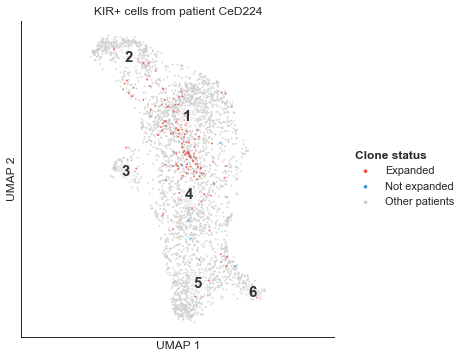

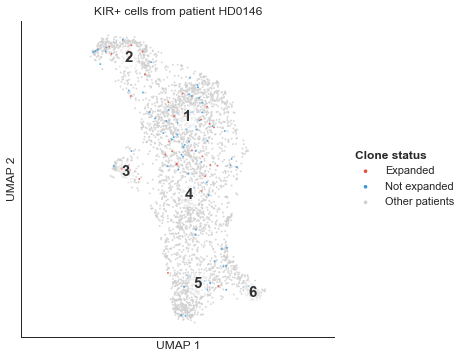

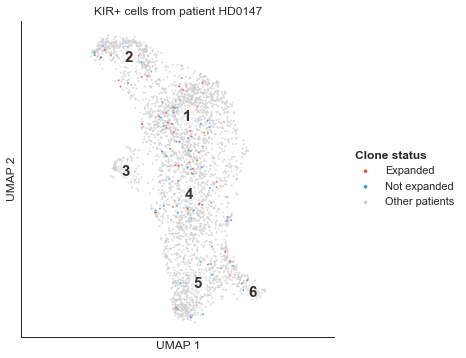

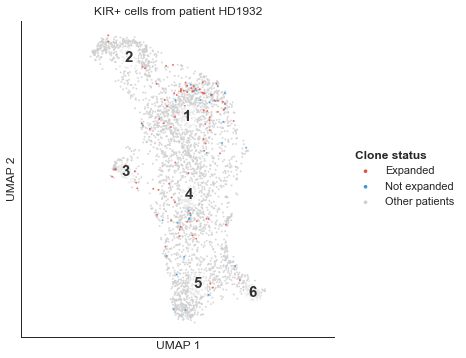

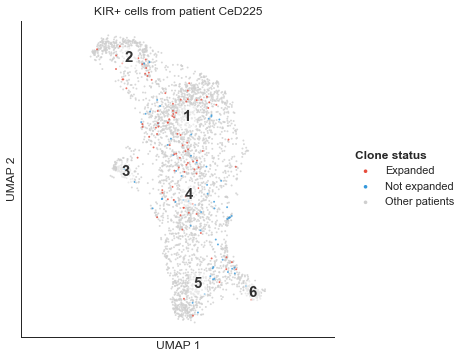

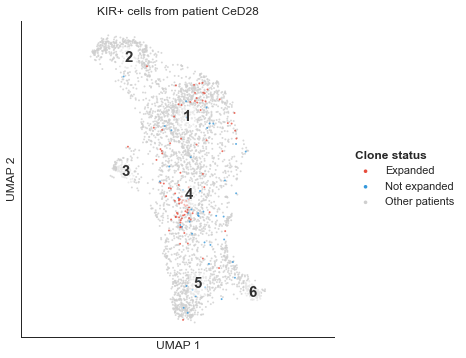

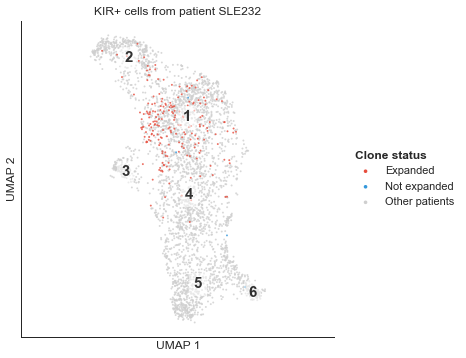

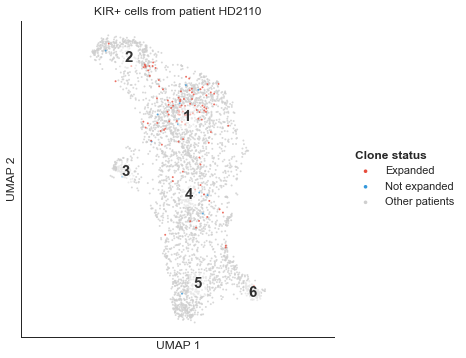

In [17]:
# plot per patient
for patient_id in umap_tcr_df["patient ID"].unique():
    # keep points from other patients, but change their expanded label
    plot_df = umap_tcr_df.copy()
    plot_df.loc[plot_df["patient ID"] != patient_id, "expanded"] = "Other patients"

    fig, ax = genetools.plots.scatterplot(
        data=plot_df,
        x_axis_key="UMAP_1",
        y_axis_key="UMAP_2",
        hue_key="expanded",
        discrete_palette=expansion_palette,
        label_key="cluster_id",
        equal_aspect_ratio=True,
        remove_x_ticks=True,
        remove_y_ticks=True,
        legend_title="Clone status",
        alpha=0.8,
        figsize=(5, 5),
    )
    plt.title(f"KIR+ cells from patient {patient_id}")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")